# Figure 3g. Empirical distribution of the number of 95% CoS versus the size of the CoS.

Empirical distribution of the number of 95% CoS in terms of the number of variants each CoS contained. CoS are color-coded by purity, with high-purity sets (purity > 0.8) distinguished from moderate-purity sets (0.5 < purity ≤ 0.8).

In [1]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/xQTL_only_colocalization.rds")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




## Organize input data

In [2]:
sets_variants <- lapply(res$colocalized_variants, function(cv){ unlist(strsplit(cv, "; ")) })
sets_vcp <- lapply(res$colocalized_variants_VCP, function(cv){ unlist(strsplit(cv, "; ")) })
sets_num_variants <- sapply(sets_variants, length)
sets_purity <- as.numeric(res$purity)
variants_number <- table(sets_num_variants)
data <- data.frame(variants_number = as.numeric(variants_number),
                   categories = as.numeric(names(variants_number)))
data$proportion <- data$variants_number / sum(data$variants_number)
purity <- c()
for (i in 1:nrow(data)){
  num <- data$categories[i]
  pos <- which(sets_num_variants == num)
  purity_cate <- sets_purity[pos]
  purity <- c(purity, c(sum(purity_cate>=0.8), sum(purity_cate<0.8)))
}
data.purity <- data.frame(
  number = rep(data$variants_number, each=2),
  categories = rep(data$categories, each = 2),
  purity = purity,
  if_pure = rep(c("Purity >= 0.8", "Purity < 0.8"), times = nrow(data))
)

In [3]:
new_data <- data.purity %>%
  mutate(group = case_when(
    categories == 1 ~ "1",
    categories == 2 ~ "2",
    categories == 3 ~ "3",
    categories == 4 ~ "4",
    categories %in% 5:10 ~ "5-10",
    categories %in% 11:20 ~ "11-20",
    categories %in% 21:50 ~ "21-50",
    categories >= 50 ~ ">50"
  )) %>%
  group_by(group, if_pure) %>%
  summarise(
    variants_number = sum(purity),
  ) %>%
  ungroup() %>%
  mutate(proportion = variants_number / sum(variants_number)) %>%
  mutate(group = factor(group, levels = c("1", "2", "3", "4", "5-10", "11-20", "21-50", ">50")))
new_data$if_pure <- factor(new_data$if_pure, levels = c("Purity >= 0.8", "Purity < 0.8"))

overall_proportions <- new_data %>%
  group_by(group) %>%
  summarise(overall_proportion = sum(proportion),
            max_variants_number = sum(variants_number)) %>%
  ungroup()


`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


## Distribution plot

In [7]:
library(ggplot2)
p1 <- ggplot(new_data, aes(x = group, y = variants_number, fill = if_pure)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("Purity < 0.8" = "grey60", "Purity >= 0.8" = "#F08060")) +
  labs(
    title = "",
    x = "Size of CoS",
    y = "Number of CoS",
    fill = ""
  ) +
  theme_minimal(base_size = 15) + # Use a minimal theme with a larger base font size
  theme(
    plot.title = element_text( size = 0 ),
    axis.title.x = element_text( margin = margin(t = 0), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 10), size = 18, angle = 30), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18, angle = 90), # Adjust y axis text margin
    legend.position = "inside",
    legend.justification = c(0.23, 0.95),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 20),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

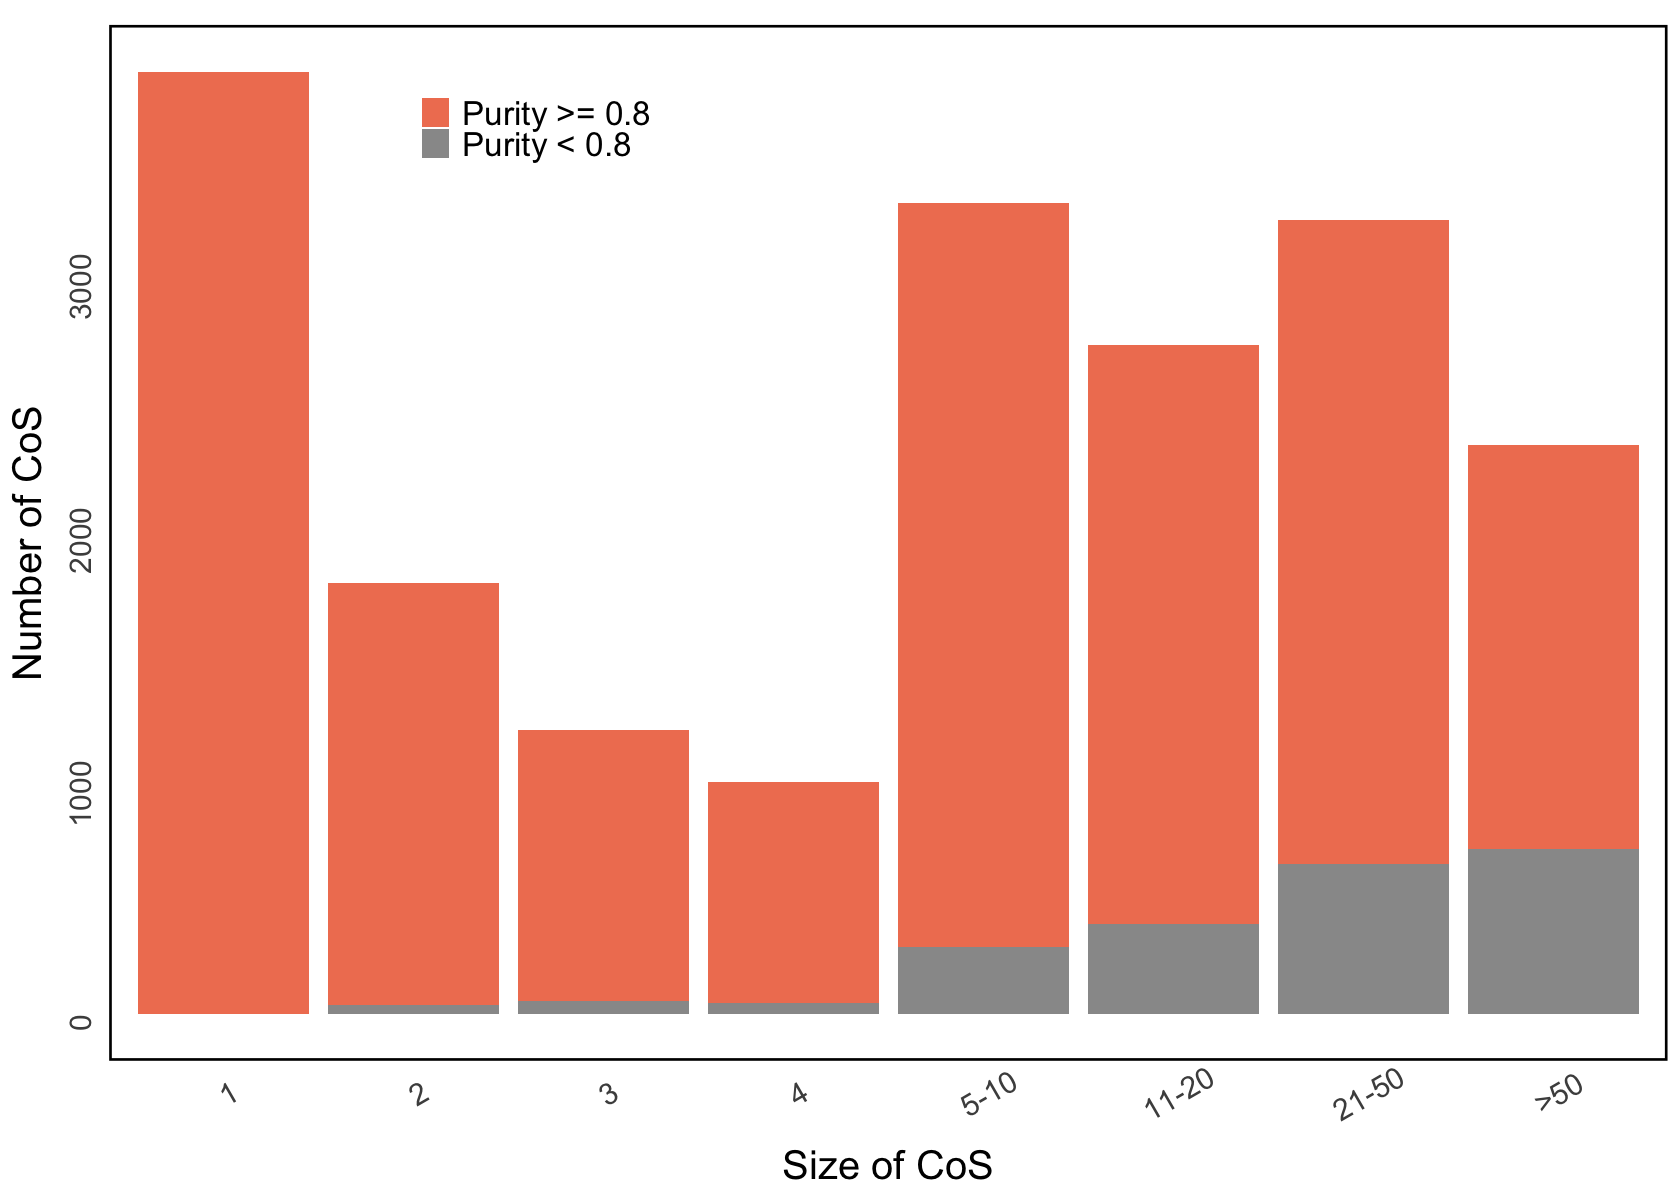

In [8]:
options(repr.plot.width = 14, repr.plot.height = 10)
p1